In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, LSTM, Dense, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
df= pd.read_csv("Mastercard_stock_history.csv",
                index_col="Date" ,parse_dates=["Date"]).drop(["Dividends","Stock Splits"], axis=1)

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08


In [5]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
tstart =2016
tend = 2020

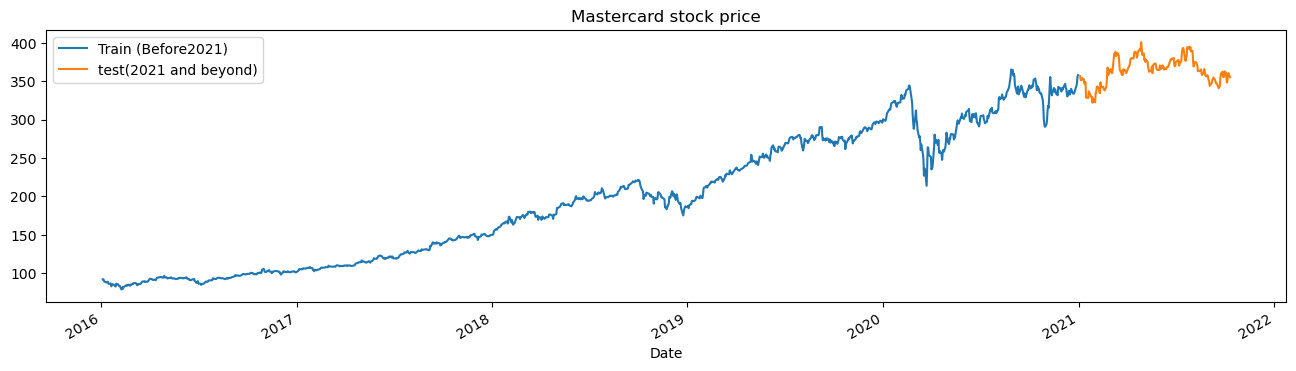

In [7]:
def train_test_plot (df,tstart,tend):
    df.loc[f"{tstart}":f"{tend}","High"].plot(figsize=(16,4),legend=True)
    df.loc[f"{tend+1}":,"High"].plot(figsize=(16,4),legend=True)
    plt.legend([f"Train (Before{tend+1})",f"test({tend+1} and beyond)"])
    plt.title("Mastercard stock price")
    plt.show()
train_test_plot(df,tstart,tend)

In [8]:
def train_test_split (df,tstart,tend):
    train = df.loc[f"{tstart}":f"{tend}","High"].values
    test = df.loc[f"{tend+1}":,"High"].values
    return train , test 
training_set , test_set = train_test_split(df,tstart,tend)

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
training_set = training_set.reshape(-1,1)
training_set_scaled = sc.fit_transform(training_set)

In [10]:
def split_sequence (sequence,n_steps):
    x , y = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1 :
            break
        seq_x , seq_y = sequence[i:end_ix],sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x),np.array(y)

In [11]:
n_steps = 60
features = 1
x_train , y_train = split_sequence(training_set_scaled ,n_steps)

In [12]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],features)

In [13]:
model_lstm = Sequential()
model_lstm.add (LSTM(units=125,activation='tanh',input_shape=(n_steps,features)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='RMSprop',loss='mse')
model_lstm.summary()
model_lstm.fit(x_train,y_train,epochs=30,batch_size=32)

NameError: name 'Sequential' is not defined

In [14]:
dataset_total = df.loc[:,"High"]
inputs = dataset_total[len(dataset_total)-len(test_set)- n_steps :].values
inputs = inputs.reshape(-1,1)

In [15]:
inputs = sc.transform(inputs)
x_test, y_test = split_sequence(inputs, n_steps)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],features)

In [16]:
predicted_stock_price = model_lstm.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

NameError: name 'model_lstm' is not defined

In [17]:
def plot_predictions (test,predicted):
    plt.plot(test,color='gray',label='Real')
    plt.plot(predicted,color='red',label='Predicted')
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()
plot_predictions(test_set,predicted_stock_price)

NameError: name 'predicted_stock_price' is not defined

In [18]:
def return_rmse(test,predicted):
    rmse = np.sqrt(mean_squared_error(test,predicted))
    print("The root mean squared error is [.:.2f].".format(rmse))
return_rmse(test_set,predicted_stock_price)

NameError: name 'predicted_stock_price' is not defined